(60000, 28, 28)


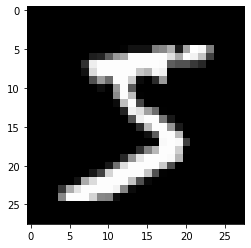

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36]
 [  0   0   0   0   0   0   0  49 238 253]
 [  0   0   0   0   0   0   0  18 219 253]
 [  0   0   0   0   0   0   0   0  80 156]]


In [3]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as rd
##tf.__version__
data = tf.keras.datasets.mnist #28x28 el yazısı rakamlar 0-9
(x_train, y_train), (x_test, y_test) = data.load_data()
print(x_train.shape) #eğitim verilerinin formatı

# ilk rakam
plt.imshow(x_train[0], cmap = "gray", vmin = 0, vmax = 255)
plt.show()
print(x_train[0][:10,:10]) #normalizasyondan önce


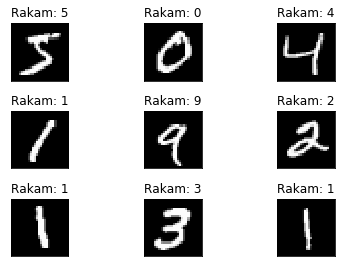

In [4]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Rakam: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Piksel Değerlerinin Dağılımı')

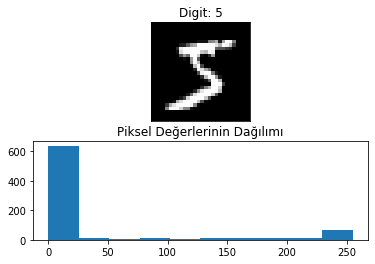

In [5]:
# 784 pikselin 0-256 aralığıdaki dağılımı
digit = 0
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[digit], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[digit]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2) 
plt.hist(x_train[digit].reshape(784))
plt.title("Piksel Değerlerinin Dağılımı")

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis = 1) #satırların bütün sütunlarını 0-1 aralığında normalize eder
x_test = tf.keras.utils.normalize(x_test, axis = 1)

model = tf.keras.models.Sequential() #sequential modeli
 
                                    
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #girdi katmanı rakamın bütün pikselleri
model.add(tf.keras.layers.Dense(512, activation =  tf.nn.relu)) # Gizli katman
model.add(tf.keras.layers.Dropout(0.2)) # overfitting engellemek için %2 sini siliyoruz
model.add(tf.keras.layers.Dense(512, activation =  tf.nn.relu)) # Gizli katman 2
model.add(tf.keras.layers.Dropout(0.2)) # overfitting engellemek için %2 sini siliyoruz
model.add(tf.keras.layers.Dense(10, activation =  tf.nn.softmax)) #çıktı katmanı 10 rakam olduğu için 10 nöron var

model.compile(loss= 'sparse_categorical_crossentropy',
             metrics= ['accuracy'],optimizer= 'adam',)


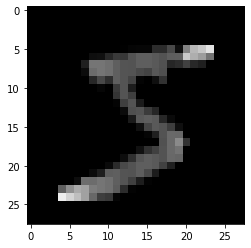

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.05780486 0.06524513]
 [0.         0.         0.         0.         0.         0.
  0.         0.12250613 0.45858525 0.45852825]
 [0.         0.         0.         0.         0.         0.
  0.         0.04500225 0.4219755  0.45852825]
 [0.         0.         0.         0.

In [7]:
plt.imshow(x_train[0], cmap = "gray", vmin = 0, vmax = 1)
plt.show()

print(x_train[0][:10,:10]) #verinin normalizasyondan sonraki hali

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 - 4s - loss: 0.2895 - accuracy: 0.9145 - val_loss: 0.1205 - val_accuracy: 0.9648
Epoch 2/20
60000/60000 - 4s - loss: 0.1099 - accuracy: 0.9660 - val_loss: 0.0979 - val_accuracy: 0.9690
Epoch 3/20
60000/60000 - 4s - loss: 0.0751 - accuracy: 0.9771 - val_loss: 0.0758 - val_accuracy: 0.9760
Epoch 4/20
60000/60000 - 4s - loss: 0.0563 - accuracy: 0.9818 - val_loss: 0.0749 - val_accuracy: 0.9778
Epoch 5/20
60000/60000 - 4s - loss: 0.0453 - accuracy: 0.9850 - val_loss: 0.0775 - val_accuracy: 0.9773
Epoch 6/20
60000/60000 - 4s - loss: 0.0381 - accuracy: 0.9871 - val_loss: 0.0846 - val_accuracy: 0.9760
Epoch 7/20
60000/60000 - 4s - loss: 0.0312 - accuracy: 0.9895 - val_loss: 0.0794 - val_accuracy: 0.9772
Epoch 8/20
60000/60000 - 4s - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.0690 - val_accuracy: 0.9815
Epoch 9/20
60000/60000 - 4s - loss: 0.0229 - accuracy: 0.9922 - val_loss: 0.0782 - val_accuracy: 0.9779
Epoch 10/20
60

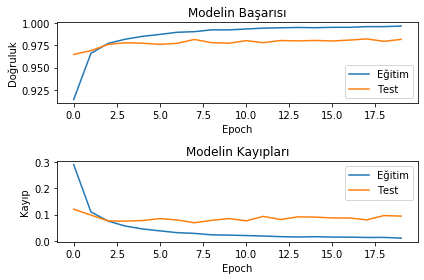

In [8]:
# modelin eğitimi ve sürecin kaydı
history = model.fit(x_train, y_train,
          batch_size=128, epochs=20, verbose = 2,
          validation_data=(x_test, y_test))

# eğitim sürecinin grafiksel yorumu
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Modelin Başarısı')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Modelin Kayıpları')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Eğitim', 'Test'], loc='upper right')

plt.tight_layout()

In [9]:
model.save("dig_rec.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: dig_rec.model/assets


In [10]:
new_model = tf.keras.models.load_model('dig_rec.model')

In [11]:
predictions = new_model.predict([x_test])

In [12]:
print("Tahmin Sonucu (Output Layer)")
print(predictions[0]) #düzenlenmediği için tahmin değeri dizi formatında, one hot encoding
print()
print("Tahmin Sonucu (Düzenlenmiş): ", np.argmax(predictions[0]))
print("Gerçek değer: ", y_test[0])


Tahmin Sonucu (Output Layer)
[2.5531083e-18 6.2856886e-16 1.0127912e-16 2.3742016e-13 3.0938253e-18
 6.4195976e-16 2.1517547e-25 1.0000000e+00 8.4187760e-19 8.7560720e-13]

Tahmin Sonucu (Düzenlenmiş):  7
Gerçek değer:  7


In [18]:
testSize = 6
random_digits = np.arange((testSize))
print("Modelin Tahminleri")
for i in range(testSize):
    random_digit = rd.randrange(0 , 10000)
    random_digits[i] = random_digit
    print(random_digit,"satırındaki rakam:",np.argmax(predictions[random_digit]))
    

Modelin Tahminleri
479 satırındaki rakam: 9
3396 satırındaki rakam: 2
9804 satırındaki rakam: 3
6614 satırındaki rakam: 2
1340 satırındaki rakam: 5
3495 satırındaki rakam: 4


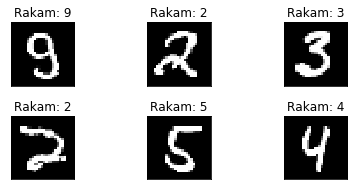

In [19]:
fig = plt.figure()
for j in range(testSize):
  plt.subplot(3,3,j+1)
  plt.tight_layout()
  plt.imshow(x_test[random_digits[j]], cmap = "gray", interpolation='none', vmin= 0, vmax = 0.25)
  plt.title("Rakam: {}".format(y_test[random_digits[j]]))
  plt.xticks([])
  plt.yticks([])

In [20]:
pred_array = np.arange(10000)
cnt = 0
for k in predictions:
    pred_array[cnt] = np.argmax(k)
    cnt+= 1
pred_array

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
from sklearn.metrics import accuracy_score
acc_Score = accuracy_score(y_test, pred_array)
acc_Score

0.9816

In [34]:
k = 0
cnt = 0
total_lost = int((100*(100 - acc_Score*100))) + 1
lost_digits = np.arange((total_lost))
for i in pred_array:
    if y_test[cnt] != i:
        lost_digits[k] = cnt
        k+= 1
    cnt+=1

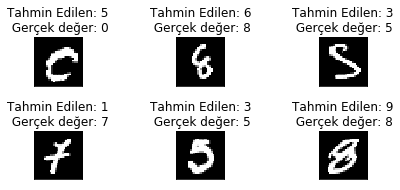

In [35]:
for i in range(testSize):
    random_digit = rd.randrange(0 , lost_digits.size)
    index = lost_digits[random_digit]
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[index], cmap = "gray", interpolation='none', vmin= 0, vmax = 0.25)
    plt.title("Tahmin Edilen: {}\n Gerçek değer: {}".format(pred_array[index],y_test[index]))
    plt.xticks([])
    plt.yticks([])

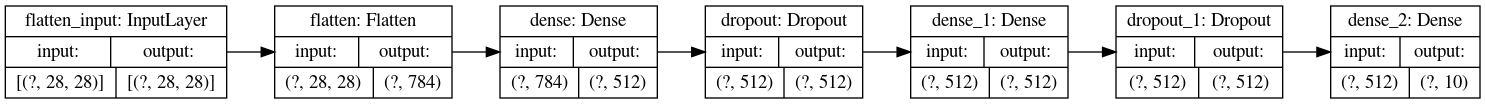

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model_plot.png", show_shapes = True, show_layer_names = True, rankdir = "LR")